类的方式，和pytorch中类似

In [6]:
import tensorflow as tf

class MyModule(tf.keras.Model):
    def __init__(self):
        super(MyModule, self).__init__()
        # 定义第一层全连接层，有 3 个神经元，使用 ReLU 激活函数，
        # 权重初始化采用 He 正态分布初始化方法，层名为 'layer1'
        self.layer1 = tf.keras.layers.Dense(3, activation='relu', kernel_initializer='he_normal', name='layer1', input_shape=(3,))
        # 定义第二层全连接层，有 3 个神经元，使用 ReLU 激活函数，
        # 权重初始化采用 He 正态分布初始化方法，层名为 'layer2'
        self.layer2 = tf.keras.layers.Dense(3, activation='relu', kernel_initializer='he_normal', name='layer2')
        # 定义第三层全连接层，有 3 个神经元，使用 ReLU 激活函数，
        # 权重初始化采用 He 正态分布初始化方法，层名为 'layer3'
        self.layer3 = tf.keras.layers.Dense(3, activation='relu', kernel_initializer='he_normal', name='layer3')

    def call(self, inputs):
        # 前向传播，输入数据依次通过第一层、第二层和第三层
        x = self.layer1(inputs)
        x = self.layer2(x)
        return self.layer3(x)

# 创建 MyModule 类的一个实例
MyModule1 = MyModule()
# 定义一个形状为 (1, 3) 的全 1 张量作为输入
x = tf.ones((1, 3))
# 将输入数据传入模型进行前向传播得到输出
y = MyModule1(x)

# 由于使用子类化 API 定义的模型在调用 summary 方法前需要先构建模型
# 这里通过指定输入形状来构建模型
MyModule1.build(input_shape=(None, 3))
# 调用 summary 方法展示模型的结构信息
MyModule1.summary()

Model: "my_module_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (1, 3)                 │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (1, 3)                 │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (1, 3)                 │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# import torch
# import torch.nn as nn
# from torchsummary import summary

# # 定义自定义的神经网络模块
# class MyModule(nn.Module):
#     def __init__(self):
#         super(MyModule, self).__init__()
#         # 定义第一层全连接层，输入维度为 3，输出维度为 3，使用 ReLU 激活函数
#         self.layer1 = nn.Sequential(
#             nn.Linear(3, 3),
#             nn.ReLU()
#         )
#         # 定义第二层全连接层，输入维度为 3，输出维度为 3，使用 ReLU 激活函数
#         self.layer2 = nn.Sequential(
#             nn.Linear(3, 3),
#             nn.ReLU()
#         )
#         # 定义第三层全连接层，输入维度为 3，输出维度为 3，使用 ReLU 激活函数
#         self.layer3 = nn.Sequential(
#             nn.Linear(3, 3),
#             nn.ReLU()
#         )

#     def forward(self, x):
#         # 前向传播，输入数据依次通过第一层、第二层和第三层
#         x = self.layer1(x)
#         x = self.layer2(x)
#         return self.layer3(x)

# # 创建 MyModule 类的一个实例
# MyModule1 = MyModule()

# # 定义一个形状为 (1, 3) 的全 1 张量作为输入
# x = torch.ones((1, 3))
# # 将输入数据传入模型进行前向传播得到输出
# y = MyModule1(x)

# # 展示模型的结构信息
# # 首先需要指定设备，这里假设使用 CPU
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# MyModule1.to(device)
# # 使用 torchsummary 展示模型结构，输入尺寸为 (3,)
# summary(MyModule1, input_size=(3,))

ModuleNotFoundError: No module named 'torchsummary'

理解什么是像素

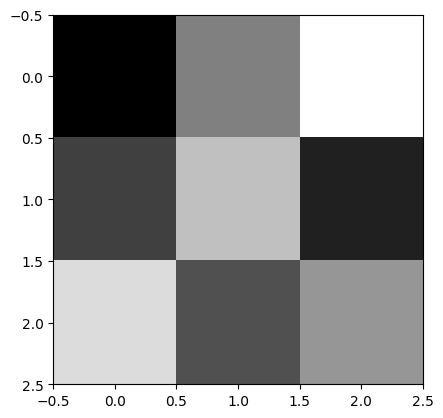

图像的像素值：
[[  0 128 255]
 [ 64 192  32]
 [220  80 150]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个 3x3 的黑白图像，每个像素的灰度值用 0 - 255 表示
image = np.array([
    [0, 128, 255],
    [64, 192, 32],
    [220, 80, 150]
], dtype=np.uint8)

# 显示图像
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

# 查看像素值
print("图像的像素值：")
print(image)

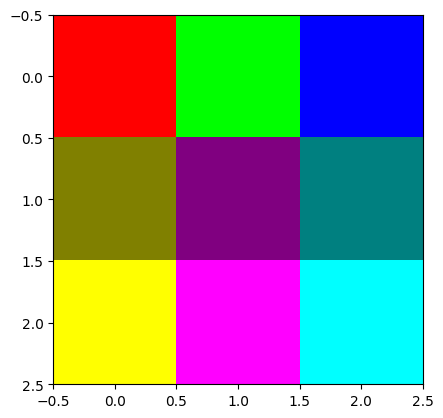

图像的像素值：
[[[255   0   0]
  [  0 255   0]
  [  0   0 255]]

 [[128 128   0]
  [128   0 128]
  [  0 128 128]]

 [[255 255   0]
  [255   0 255]
  [  0 255 255]]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个 3x3 的彩色图像，每个像素由 RGB 三个通道组成
# 这里我们手动设置每个像素的 RGB 值
image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[128, 128, 0], [128, 0, 128], [0, 128, 128]],
    [[255, 255, 0], [255, 0, 255], [0, 255, 255]]
], dtype=np.uint8)

# 显示图像
plt.imshow(image)
plt.show()

# 查看像素值
print("图像的像素值：")
print(image)